<br>
   Description: Perform Affinity Propagation on Handwritten digits dataset<br>
   Author: Krutarth Trivedi,  MS Robotics'23, WPI | ktrivedi@wpi.edu<br>
   OS: ubuntu 20.04 LTS<br>
   Software/Tools/Language: Python, Visual Studio Code</br>
   <br> Later imported to Jupyter Notebook<br>

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import load_digits
from scipy import ndimage
from sklearn import metrics, manifold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def performance_measure(y_set, y_pred):
    
    plot = metrics.ConfusionMatrixDisplay.from_predictions(y_set, y_pred)
    plot.figure_.suptitle("Confusion Matrix")
    plt.show()
    print(f"Confusion matrix:\n{plot.confusion_matrix}")
    FM_index = metrics.fowlkes_mallows_score(y_set, y_pred)
    print("Fowlkws - Mallows Index: ", FM_index)

In [3]:
def plot_print(X, Y, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 4))
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(Y[i]),
            color=plt.cm.nipy_spectral(model.labels_[i] / 20.0),
            fontdict={"weight": "bold", "size": 9},
        )
    plt.xticks([])
    plt.yticks([])
    plt.title(title,size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [4]:
x, y = load_digits(return_X_y = True)
shift = lambda k: ndimage.shift(
        k.reshape((8, 8)), 0.3 * np.random.normal(size=2), mode="constant"
    ).ravel()
x = np.concatenate([x, np.apply_along_axis(shift, 1, x)])
y = np.concatenate([y, y], axis=0)
X_scaled = manifold.SpectralEmbedding(n_components=2).fit_transform(x)

In [5]:
model = AffinityPropagation(preference = -39000,random_state=5).fit(x)

In [6]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)
print("Number of clusters", n_clusters_)

Number of clusters 22


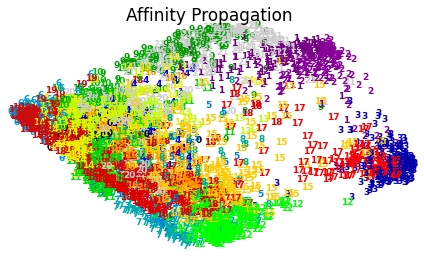

In [7]:
plot_print(X_scaled, labels ,'Affinity Propagation')

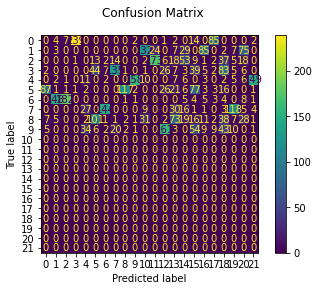

Confusion matrix:
[[  0   4   7 239   0   0   0   0   0   2   0   0   1   2   0  14   0  85
    0   0   0   2]
 [  0   3   0   0   0   0   0   0   0   0 132  24   0   7  29   0  85   0
    2   7  75   0]
 [  0   0   0   1   0  13   2  14   0   0   2 173   6  18  53   9   1   2
   37   5  18   0]
 [  2   0   0   0   0  44   7 135   1   0   1   0  26   7   3  39   5   2
   83   5   6   0]
 [  0   2   1   0  11   0   2   0   0 158  10   0   0   7   6   0   3   0
    2   5   6 149]
 [ 87   1   1   1   2   0   0   0 117   2   0   0  26  21   6  77   3   3
   16   0   0   1]
 [  0 148 182   0   0   0   0   0   1   1   0   0   0   0   5   4   5   3
    4   0   8   1]
 [  0   0   0   0  27   0 144   0   0   0   9   0   0  30  16   1   1   0
    3 118   5   4]
 [  7   5   0   0   2 101   1   1   2   1  31   0   2  73  19  16  11   2
   38   7  28   1]
 [  5   0   0   0  34   6   2  20   2   1   0   0 161   3   0  54   9   9
   43  10   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   

In [8]:
performance_measure(y, labels)